# Exemple de detecció d'outliers

Importem les nostres dades

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_new.xlsx")

data["cost_valor"] = data["preu_venda_unitari_2023"] / data["cost_unitari_stock_2023"]
features = [ 'proporcio_variacio_preu_venda_unitari_2022_2023', 'diferencia_entrada_sortida', 'dies_ultima_sortida', 'stock_final_2023', 'cost_valor']

X = data[features]

X = X.dropna()

In [2]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [3]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
X['PCA Component 1'] = pca_features[:, 0]
X['PCA Component 2'] = pca_features[:, 1]


Executem el model Isolation Forest, i observem els punts que prediu com a outliers (en vermell)

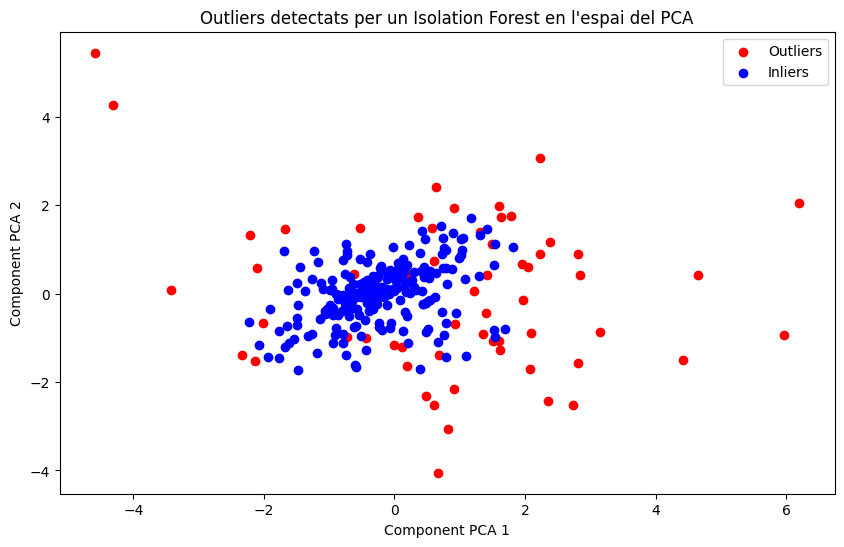

In [4]:
from sklearn.ensemble import IsolationForest

# Isolation Forest per detectar outliers
isolation_forest = IsolationForest(contamination=0.2, random_state=42)
outlier_labels = isolation_forest.fit_predict(scaled_features)
X['Outlier'] = outlier_labels

# Visualitzem al mateix PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[X['Outlier'] == -1]['PCA Component 1'],
            X[X['Outlier'] == -1]['PCA Component 2'],
            color='red', label='Outliers')
plt.scatter(X[X['Outlier'] == 1]['PCA Component 1'],
            X[X['Outlier'] == 1]['PCA Component 2'],
            color='blue', label='Inliers')
plt.xlabel('Component PCA 1')
plt.ylabel('Component PCA 2')
plt.title("Outliers detectats per un Isolation Forest en l'espai del PCA")
plt.legend()
plt.show()

La variable outlier és -1 per aquells detectats com a tal, i 1 pels normals

In [19]:
from IPython.display import display, HTML
display(HTML(X.to_html()))

,proporcio_variacio_preu_venda_unitari_2022_2023,diferencia_entrada_sortida,dies_ultima_sortida,stock_final_2023,cost_valor,PCA Component 1,PCA Component 2,Outlier
4,0.235256,-15.0,-45.0,66500.0,1.930786,1.635355,1.726771,-1
10,-0.142771,-50.0,26.0,23000.0,0.997702,-1.477903,-1.738791,1
15,-0.105171,13.0,-50.0,100000.0,1.771301,-0.422131,0.313526,1
21,0.083465,13.0,-3.0,9600.0,1.009712,-0.065080,-0.777849,1
23,-0.011311,13.0,-53.0,42000.0,1.423348,-0.373392,0.043274,1
30,-0.127185,1.0,-61.0,36000.0,1.165999,-1.490285,-0.717102,1
37,0.072458,5.0,-57.0,15400.0,1.936617,0.739337,1.255399,1
43,0.048617,9.0,-40.0,56000.0,1.202398,-0.268087,-0.239236,1
44,0.102115,2.0,-54.0,14700.0,1.354715,0.123383,0.324270,1
50,0.058240,26.0,-50.0,17000.0,1.283102,-0.084169,-0.007662,1


Observem que hi ha outliers positius i negatius. Per separar-los, usem un clústering (KMeans)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33400\3628016060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['Cluster'] = cluster_labels
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33400\3628016060.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['PCA Component 1'] = pca_features[:, 0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33400\3628016060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

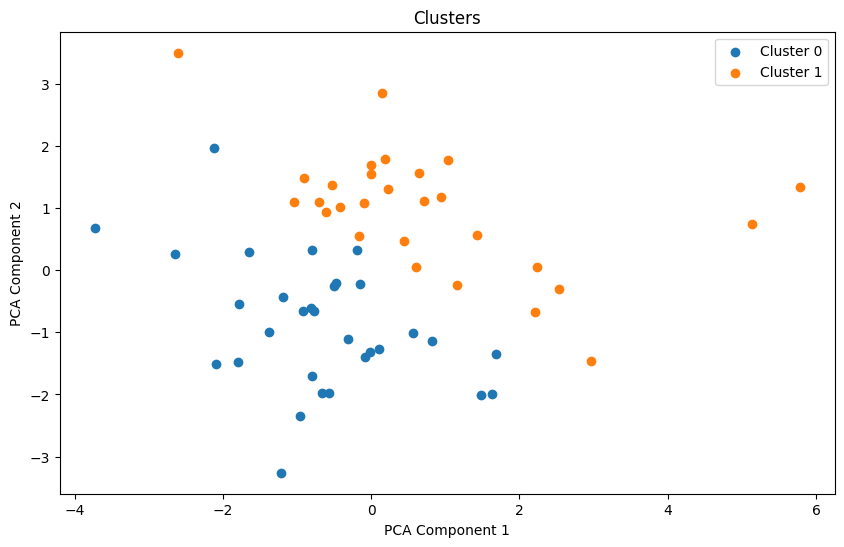

In [20]:
optimal_n_clusters = 2

outliers_df = X[X["Outlier"] == -1]
scaled_features2 = scaler.fit_transform(outliers_df)

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)

cluster_labels = kmeans.fit_predict(scaled_features2)
outliers_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features2)
outliers_df['PCA Component 1'] = pca_features[:, 0]
outliers_df['PCA Component 2'] = pca_features[:, 1]
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 1'],
                outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

Els del clúster 0 són els negatius (hem analitzat les components del PCA). Mostrem els que s'han detectat com a tal

In [25]:
display(outliers_df[outliers_df["Cluster"]==0].iloc[1:12])

,proporcio_variacio_preu_venda_unitari_2022_2023,diferencia_entrada_sortida,dies_ultima_sortida,stock_final_2023,cost_valor,PCA Component 1,PCA Component 2,Outlier,Cluster
124,-0.064825,167.0,123.0,60000.0,0.990223,-0.664359,-1.972650,-1,0
252,0.092485,238.0,61.0,188300.0,1.140611,-0.920357,-0.655536,-1,0
270,0.126538,236.0,159.0,1100.0,1.395135,-1.787568,-0.545909,-1,0
286,-0.116236,153.0,188.0,11000.0,1.086957,-0.959442,-2.346924,-1,0
290,-0.152761,29.0,296.0,1100.0,1.039750,-1.212393,-3.260734,-1,0
312,-0.018957,-28.0,172.0,16000.0,1.148261,-0.572362,-1.978138,-1,0
413,0.080510,84.0,250.0,4000.0,1.333384,-1.801074,-1.476121,-1,0
448,-0.260049,37.0,-40.0,400000.0,1.053062,1.478061,-2.013648,-1,0
473,-0.248949,-10.0,-54.0,880000.0,1.372129,1.685179,-1.354930,-1,0
489,-0.090620,164.0,52.0,400000.0,1.168787,-0.077084,-1.396486,-1,0
